In [13]:
%matplotlib notebook

In [14]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
# Import our data into pandas from CSV
trips_data = '../Resources/trip.csv'
bike_trips_df = pd.read_csv(trips_data, low_memory=False)

bike_trips_df

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971
5,10/13/2014 10:47,SEA00337,808.805,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1974
6,10/13/2014 11:45,SEA00202,596.715,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1978
7,10/13/2014 11:45,SEA00311,592.131,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1983
8,10/13/2014 11:45,SEA00486,586.347,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Female,1974
9,10/13/2014 11:45,SEA00434,587.634,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1958


In [17]:
# Split up our data into groups based upon 'gender'
gender_groups = bike_trips_df.groupby('gender')

gender_groups.count()

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,birthyear
gender,,,,,,,,,
Female,37562,37562,37562,37562,37562,37562,37562,37562,37558
Male,140564,140564,140564,140564,140564,140564,140564,140564,140564
Other,3431,3431,3431,3431,3431,3431,3431,3431,3431
stoptime,1,1,1,1,1,1,1,1,1


In [22]:
# Find out how many of each gender took bike trips
gender_trips = gender_groups['gender'].count()
gender_trips

gender
Female       37562
Male        140564
Other         3431
stoptime         1
Name: gender, dtype: int64

In [23]:
# Drop the 'stoptime' row that is contained within our group
gender_trips = gender_trips.drop(gender_trips.index[3])

<IPython.core.display.Javascript object>


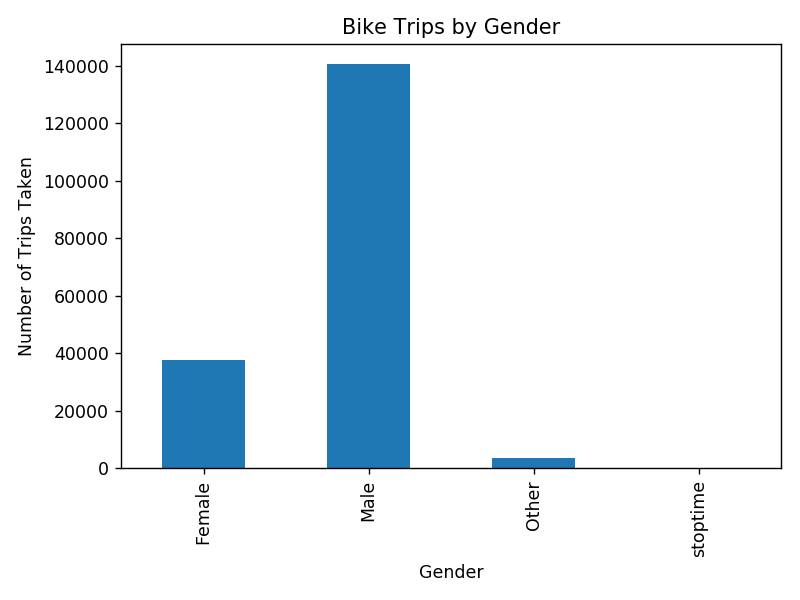

In [24]:
# Chart our data, give it a title, and label the axes
gender_chart = gender_trips.plot(kind="bar", title="Bike Trips by Gender")
gender_chart.set_xlabel("Gender")
gender_chart.set_ylabel("Number of Trips Taken")

plt.show()
plt.tight_layout()

In [26]:
# Split up our data into groups based upon 'bikeid' and 'gender'
bike_groups = bike_trips_df.groupby(['bikeid','gender'])

# Create a new variable that holds the sum of our groups
sum_it_up = bike_groups.sum()
sum_it_up.head(12)

,tripduration
gender,
Female,2.654594e+07
Male,7.940191e+07
Other,2.104395e+06
stoptime,1.799067e+04


In [ ]:
# Make a variable called bike_id and store a 'bikeid' in it
bike_id = "SEA00001"

# Collect the trips of the 'bikeid' above
just_one_bike = sum_it_up.loc[bike_id]

In [25]:
just_one_bike

,tripduration
gender,
Female,15876.665
Male,41150.373
Other,276.880


<IPython.core.display.Javascript object>


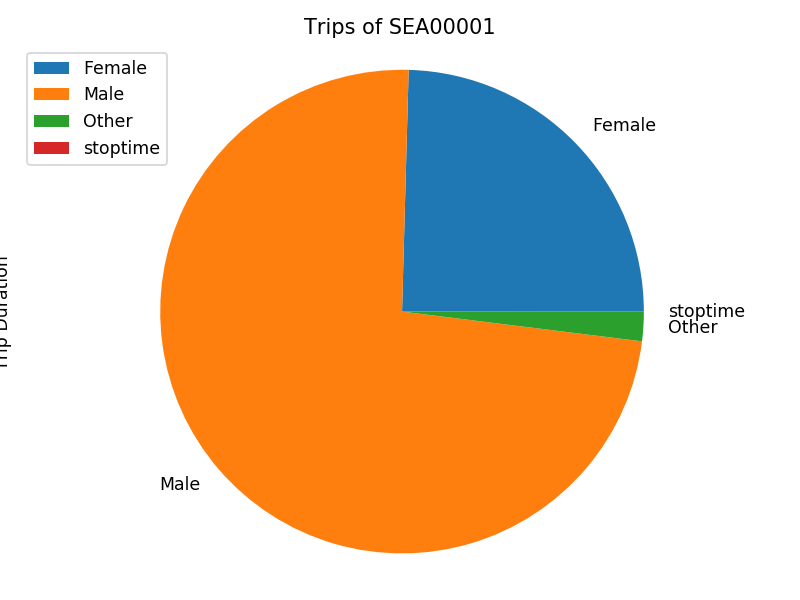

(-1.117690178610824,
 1.1008423895216652,
 -1.1151910849851205,
 1.1058923148041886)

In [27]:
# Place the gender keys for that single bike into a list
gender_list = just_one_bike.keys()

# Create a pie chart based upon the trip duration of that single bike
bike_pie = sum_it_up.plot(kind="pie", y=gender_list, title=("Trips of " + bike_id))
bike_pie.set_ylabel("Trip Duration")

plt.show()
plt.tight_layout()
plt.axis("equal")